In [ ]:
from typing import TypedDict, List
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START , END
from langchain_core.messages import HumanMessage
from langchain_google_genai import ChatGoogleGenerativeAI

load_dotenv()

model=ChatGoogleGenerativeAI(
    model='gemini-2.5-flash'
)

In [5]:


class AgentState(TypedDict):
    message: List[HumanMessage]

def process_message(state: AgentState) -> AgentState:
    model_response = model.invoke(state['message'])
    state['message'].append(model_response)
    print(f"Agent response: {model_response}")
    print('\n\n')
    return state

def end(state: AgentState) -> AgentState:
    return state



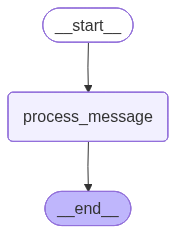

In [6]:
graph = StateGraph(AgentState)

graph.add_node('process_message', process_message)

graph.add_edge(START, 'process_message')
graph.add_edge('process_message', END)

bot = graph.compile()

bot



In [8]:
agent_input = {
    'message': [HumanMessage(content='Hello, how are you?')]
}

response = bot.invoke(agent_input)

print(response)

ChatGoogleGenerativeAIError: Error calling model 'gemini-2.0-flash-exp' (RESOURCE_EXHAUSTED): 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_input_token_count, limit: 0, model: gemini-2.0-flash-exp\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash-exp\n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 0, model: gemini-2.0-flash-exp\nPlease retry in 59.826837118s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_input_token_count', 'quotaId': 'GenerateContentInputTokensPerModelPerMinute-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash-exp'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash-exp'}}, {'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerDayPerProjectPerModel-FreeTier', 'quotaDimensions': {'location': 'global', 'model': 'gemini-2.0-flash-exp'}}]}, {'@type': 'type.googleapis.com/google.rpc.RetryInfo', 'retryDelay': '59s'}]}}